# Réduction de variables dans TSG3 train

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_dir = 'data/'

In [3]:
data = pd.read_csv(data_dir + 'TSG3_train_2386_samples_1685_genes.csv', sep=';', index_col=0)

## Cibles

In [4]:
y = data['target']
y.head()

id_sample
TCGA-85-7710-11A               bronchus_lung
TCGA-DD-A3A8-11A                       liver
GTEX-PX3G-0326-SM-2I3EO                heart
GTEX-XLM4-0011-R3B-SM-4AT6E            brain
GTEX-RM2N-0726-SM-48FD5            esophagus
Name: target, dtype: object

## Dataset d'entrainement

In [5]:
X = data.drop(columns=['target'])
X.head()

,NAT2@10,AANAT@15,ABCA4@24,ACRV1@56,ADH1A@124,ADH4@127,ACAN@176,AHSG@197,ALPG@251,AMY2A@279,...,LOC102724804@102724804,RGS2-AS1@102724954,CASC23@103581031,LINC01337@103689917,LINC01269@103695436,SMAD1-AS1@104326058,LINC01320@104355288,LINC01525@104355292,FOXP1-AS1@104502416,LOC104613533@104613533
id_sample,,,,,,,,,,,,,,,,,,,,,
TCGA-85-7710-11A,0.163748,0.766694,0.767072,0.022848,0.139660,0.040948,0.107942,0.000000,1.406033,0.013358,...,0.161115,0.000000,0.0,0.214748,0.864863,0.0,0.012611,0.0,0.070998,0.0
TCGA-DD-A3A8-11A,4.003451,0.000000,0.110885,0.026463,8.568801,9.615037,0.000000,10.921722,0.000000,0.015480,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.401312,0.0,0.000000,0.0
GTEX-PX3G-0326-SM-2I3EO,0.052237,0.045330,0.061543,0.015814,0.023372,0.016306,0.149207,0.040630,0.007055,0.000000,...,0.000000,0.000000,0.0,0.187641,0.000000,0.0,0.000000,0.0,0.000000,0.0
GTEX-XLM4-0011-R3B-SM-4AT6E,0.108329,0.350975,0.085389,0.486369,0.029594,0.041027,0.150139,0.117122,0.011917,1.130954,...,0.000000,0.000000,0.0,0.066263,0.000000,0.0,0.036595,0.0,0.062718,0.0
GTEX-RM2N-0726-SM-48FD5,0.047108,0.176655,0.084551,0.074389,0.234415,0.756130,0.049303,0.280086,0.000000,0.306497,...,0.000000,0.074918,0.0,0.180624,2.556904,0.0,0.000000,0.0,0.000000,0.0


## Variance

In [6]:
variance = X.var().sort_values(ascending=False)
variance = pd.DataFrame(variance, index=variance.index, columns=['var'])
variance['gene_index'] = np.arange(variance.shape[0])
variance.head()

,var,gene_index
GFAP@2670,9.925285,0
SFTPC@6440,9.351836,1
SFTPB@6439,9.280292,2
SFTPA2@729238,8.640975,3
SFTPA1@653509,8.446627,4


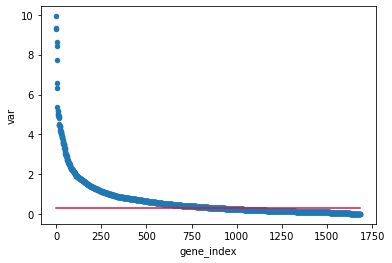

In [7]:
noise_level = 0.3
ax = variance.plot.scatter(x='gene_index', y='var')
l = ax.plot([0, variance.shape[0]], [noise_level, noise_level], color='crimson')

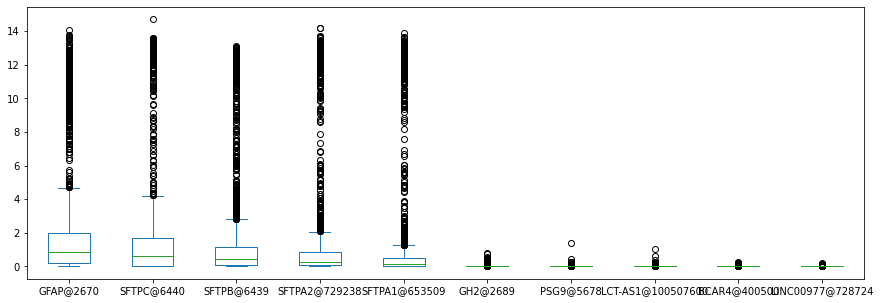

In [8]:
top_var = list(variance.head(5).index)
bottom_var = list(variance.tail(5).index)
selected = [*top_var, *bottom_var]
ax = X[selected].plot.box(figsize=(15, 5))

## Réduction de variables par variance

### Condition : variance au dessus du niveau de bruit

In [9]:
# noise_level = 0.3
cond = variance['var']>noise_level
selected_features = list(variance[cond].index)
print(len(selected_features))

882


### Export dans un fichier

In [10]:
train = pd.DataFrame(X[selected_features])
train['target'] = y.loc[X.index]
train = train[['target', *selected_features]]
train.to_csv(data_dir + 'TSG3_train_' + str(train.shape[0]) + '_samples_' + str(len(selected_features)) + '_genes.csv', sep=';', index=True)